In [75]:
import pandas as pd
import seaborn as sns
import yaml
import requests
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import rc
from tqdm import tqdm

PTS_PER_INCH = 72.26999
# Latex text width in points
TEXT_WIDTH_PTS = 505.12177
# Latex column width in points
COLUMN_WIDTH_PTS = TEXT_WIDTH_PTS / 2
# Latex column width in inches
COLUMN_WIDTH_INCHES = COLUMN_WIDTH_PTS / PTS_PER_INCH
# Latex text width in inches
TEXT_WIDTH_INCHES = TEXT_WIDTH_PTS / PTS_PER_INCH
# DPI for figures
DPI = 600

plt.rcParams["font.family"] = "sans"
plt.rcParams['font.stretch'] = 'condensed'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams["axes.labelweight"] = "bold"

palette = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3b3"]

color = '#de2d26'
edgecolor = 'black'
width = .5
bar_params = dict(color=palette[1], edgecolor=edgecolor, width=width)
grid_params = dict(color='gray', alpha=0.5)

In [16]:
with open('config.yml') as file_handle:
    config = yaml.load(file_handle, yaml.FullLoader)

ENDPOINT_URL = config['rest_api']
PLOT_PATH = Path('./summary')

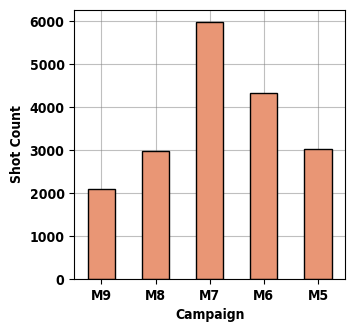

In [24]:
url="http://mastapp.site/json/shots/aggregate?data=shot_id$count&groupby=campaign&sort=-campaign"
df = pd.read_json(url)

fig, ax = plt.subplots(1, 1, figsize=(COLUMN_WIDTH_INCHES, COLUMN_WIDTH_INCHES))

sns.barplot(df, x='campaign', y='count_shot_id', ax=ax, **bar_params)

ax.set_xlabel('Campaign')
ax.set_ylabel('Shot Count')
ax.set_axisbelow(True)
ax.grid(**grid_params)

plt.savefig(PLOT_PATH / 'campaign_shots_summary.pdf')

In [37]:
url="http://mastapp.site/json/signal_datasets?per_page=100"
response = requests.get(url)
total_pages = int(response.headers['x-total-pages'])
dfs = [pd.read_json(url + f'&page={i}') for i in range(total_pages)]
df = pd.concat(dfs)
df

,uuid,name,units,rank,url,csd3_path,description,signal_type,quality,doi,dimensions
0,2f78475e-c766-545f-9b95-4d95c634ea98,ABM_CALIB_SHOT,dimensionless,1,s3://mast/ABM_CALIB_SHOT.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,Shot used for calibration (obsolete),Analysed,Not Checked,,[time]
1,0496f46d-cc02-55c9-9cb8-b19c3ada2002,ABM_CHANNEL_STATUS,dimensionless,2,s3://mast/ABM_CHANNEL_STATUS.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,"Failed = 0, OK = 1",Analysed,Not Checked,,"[time, dim_0]"
2,fda31845-7f97-53d9-b0bd-c4eb94741017,ABM_CHANNEL_TYPE,dimensionless,2,s3://mast/ABM_CHANNEL_TYPE.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,"Channel type (0 = poloidal, 1 = co-tangential,...",Analysed,Not Checked,,"[time, dim_0]"
3,4eca20e8-632b-54d8-9c33-e240ab6ddab8,ABM_GAIN,dimensionless,2,s3://mast/ABM_GAIN.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,Gain of pre-amplifiers,Analysed,Not Checked,,"[time, dim_0]"
4,cc94cf82-d8ec-5104-bd7b-cbadf240d2dd,ABM_I-BOL,dimensionless,2,s3://mast/ABM_I-BOL.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,Incident powers (x - channel),Analysed,Not Checked,,"[time, chord_number]"
...,...,...,...,...,...,...,...,...,...,...,...
68,10ed3a41-f062-5d3d-9e7c-9bfa878b31d6,AMB_OBV17,dimensionless,1,s3://mast/AMB_OBV17.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,"Outer discrete Br magnetic coil array r=1.590,...",Analysed,Not Checked,,[time]
69,e8c8c81f-a63b-5a35-a351-13bac038d771,AMB_OBV18,dimensionless,1,s3://mast/AMB_OBV18.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,"Outer discrete Br magnetic coil array r=1.440,...",Analysed,Not Checked,,[time]
70,15ee2882-cf3b-54ba-9d1b-bd8786b6c86a,AMB_OBV19,dimensionless,1,s3://mast/AMB_OBV19.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,"Outer discrete Br magnetic coil array r=1.440,...",Analysed,Not Checked,,[time]
71,1b3cccaa-2f07-5a63-b7aa-cd76ee2265c9,AMB_STATUS,dimensionless,1,s3://mast/AMB_STATUS.zarr,/rds/project/rds-sPGbyCAPsJI/archive/zarr/M7/A...,,Analysed,Not Checked,,[time]


In [84]:
url="http://mastapp.site/json/signals?per_page=100"
response = requests.get(url)
print(response.headers)
original = 7468739
total_pages = int(response.headers['x-total-pages'])
# dfs = [pd.read_json(url + f'&page={i}') for i in tqdm(range(total_pages))]
# df_signals = pd.concat(dfs)

{'Server': 'nginx/1.23.4', 'Date': 'Thu, 29 Feb 2024 16:45:39 GMT', 'Content-Type': 'application/json', 'Content-Length': '36001', 'Connection': 'keep-alive', 'x-total-count': '7468655.0', 'x-total-pages': '74687', 'link': '<http://mastapp.site/json/signals?per_page=100>; rel="next"', 'Strict-Transport-Security': 'max-age=31536000'}


/tmp/ipykernel_455793/2938176294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m9['rank'] = df_m9['rank'].astype(str)


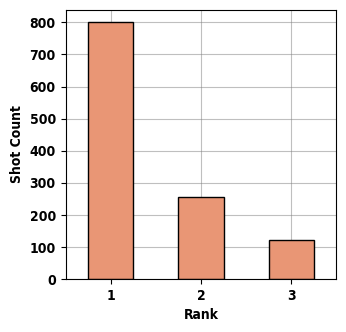

In [53]:
df_m9 = df.loc[df.csd3_path.str.contains('M9')]
df_m9['rank'] = df_m9['rank'].astype(str)
df_m9 = df_m9.groupby('rank').name.count()

fig, ax = plt.subplots(1, 1, figsize=(COLUMN_WIDTH_INCHES, COLUMN_WIDTH_INCHES))

sns.barplot(df_m9, ax=ax, **bar_params)

ax.set_xlabel('Rank')
ax.set_ylabel('Shot Count')
ax.grid(**grid_params)
ax.set_axisbelow(True)

<xarray.Dataset>
Dimensions:  (time: 30000)
Coordinates:
  * time     (time) float32 -2.0 -2.0 -2.0 -1.999 -1.999 ... 3.999 3.999 4.0 4.0
Data variables:
    data     (time) float32 dask.array<chunksize=(30000,), meta=np.ndarray>
    error    (time) float32 dask.array<chunksize=(30000,), meta=np.ndarray>
Attributes: (12/19)
    created:       2024-03-01T15:16:24.196838
    dataset_uuid:  29ea843c-bdc6-5311-9632-4c593275db84
    description:   Plasma Current
    file_name:     None
    format:        None
    identifier:    81ee8587-4cd8-5a32-bc9b-b1dcf7277005
    ...            ...
    shot_id:       30110
    source:        AMC
    status:        1
    time_index:    0
    type:          Analysed
    units:         kA

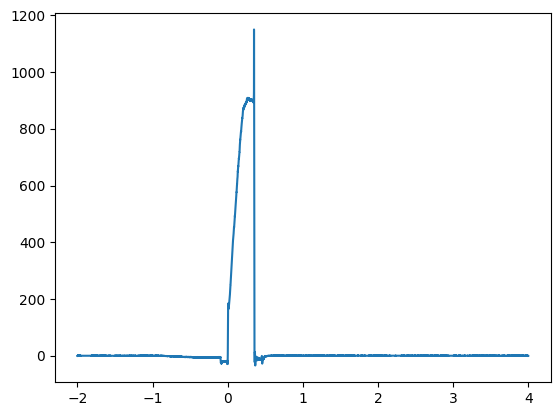

In [94]:
import matplotlib.pyplot as plt
import zarr
import s3fs
import xarray as xr

access_key = "PZACJ5JF2XUPKC07F59V"
secret_key = "SoWr0W6OtA2MB7Si8AXpFtRe4sBYxZCQgsZ44K5B"
ENDPOINT_URL = 'https://s3.echo.stfc.ac.uk'
s3 = s3fs.S3FileSystem(anon=False, key=access_key, secret=secret_key, client_kwargs={'endpoint_url': ENDPOINT_URL})
store = zarr.storage.FSStore('s3://mast/AMC/AMC_PLASMA-CURRENT.zarr', fs=s3)
ds = xr.open_zarr(store, '30110')
plt.plot(ds.time, ds.data)
ds

In [70]:

s3 = s3fs.S3FileSystem(anon=False, key=access_key, secret=secret_key, client_kwargs={'endpoint_url': ENDPOINT_URL})
s3.ls('s3://mast')

['mast/AMC_PLASMA-CURRENT.zarr']

In [73]:

s3 = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': ENDPOINT_URL})
s3.ls('s3://mast')

PermissionError: An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Unknown